In [53]:
import tarfile
import os
import shutil

import glob
import numpy as np 

import tarfile

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [81]:
TARGET_PATH = "Images"
if os.path.exists(TARGET_PATH):
    shutil.rmtree(TARGET_PATH)

In [82]:
# 압축 풀어주는 코드
fname = "images.tar"
tar = tarfile.open(fname, "r:tar")
tar.extractall()
tar.close()

In [83]:
# 강아지 종류가 120 종류
len(os.listdir(TARGET_PATH))

120

In [84]:
for dir_name in os.listdir(TARGET_PATH):
    breed_joined_name = "_".join(dir_name.split("-")[1:])
    breed_name = breed_joined_name.lower()
    source_dir = os.path.join(TARGET_PATH, dir_name)
    target_dir = os.path.join(TARGET_PATH, breed_name)
    shutil.move(source_dir, target_dir) 

In [85]:
dataset = []
for filepath in glob.iglob(f'{TARGET_PATH}/**/*.jpg', recursive=True):
    breed_name = filepath.split("/")[1]
    dataset.append([filepath, breed_name])
dataset = np.array(dataset)

In [59]:
dataset

array([['Images/weimaraner/n02092339_6620.jpg', 'weimaraner'],
       ['Images/weimaraner/n02092339_6430.jpg', 'weimaraner'],
       ['Images/weimaraner/n02092339_2510.jpg', 'weimaraner'],
       ...,
       ['Images/dingo/n02115641_1940.jpg', 'dingo'],
       ['Images/dingo/n02115641_2764.jpg', 'dingo'],
       ['Images/dingo/n02115641_6639.jpg', 'dingo']], dtype='<U57')

In [86]:
from sklearn.model_selection import train_test_split

train_image, test_image, train_target, test_target = train_test_split(dataset[:,0], dataset[:,1], stratify=dataset[:,1])

In [87]:
import pandas as pd
pd.Series(train_target).value_counts() / len(train_target) # 각 종류에 따른 비율

maltese_dog               0.012245
afghan_hound              0.011597
scottish_deerhound        0.011273
bernese_mountain_dog      0.010625
samoyed                   0.010625
                            ...   
malinois                  0.007256
welsh_springer_spaniel    0.007256
border_collie             0.007256
doberman                  0.007256
redbone                   0.007191
Length: 120, dtype: float64

In [88]:
pd.Series(test_target).value_counts() / len(test_target)

maltese_dog             0.012245
afghan_hound            0.011662
scottish_deerhound      0.011273
pomeranian              0.010690
irish_wolfhound         0.010690
                          ...   
golden_retriever        0.007191
affenpinscher           0.007191
dhole                   0.007191
eskimo_dog              0.007191
bouvier_des_flandres    0.007191
Length: 120, dtype: float64

In [89]:
DATA_PATH = "dataset"
shutil.rmtree(DATA_PATH)

## 앞서 나눈 train_test_split 데이터를 train & test 폴더를 나누어 파일들을 이동시켜주고자 한다
if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)
    os.makedirs(os.path.join(DATA_PATH, "train"))
    os.makedirs(os.path.join(DATA_PATH, "test"))
    
    for breed_name in set(test_target):
        os.makedirs(os.path.join(DATA_PATH, "train", breed_name))
        os.makedirs(os.path.join(DATA_PATH, "test", breed_name))

In [90]:
import shutil

for filepath, taregt_dir in zip(train_image.tolist(), train_target.tolist()):        
    filename = filepath.split("/")[-1] # 'Images/dingo/n02115641_1940.jpg' 중 n02115641_1940.jpg
    source_path = filepath # dingo
    target_dir = os.path.join(DATA_PATH, "train", taregt_dir, filename) # taregt_dir : dingo이므로
    shutil.copy(source_path, target_dir) # 해당 source_path 파일 (n02115641_1940.jpg) 을 dataset/train/dingo/n02115641_1940.jpg 로 복사
    
for filepath, taregt_dir in zip(test_image.tolist(), test_target.tolist()):        
    filename = filepath.split("/")[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, "test", taregt_dir, filename)
    shutil.copy(source_path, target_dir) 

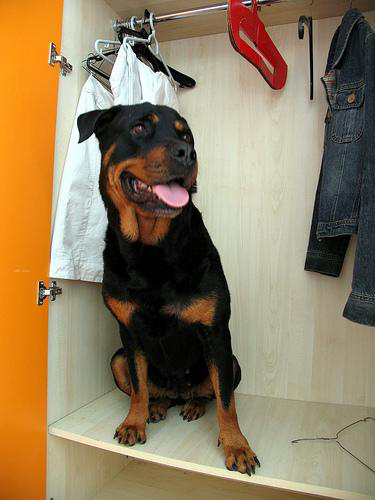

In [91]:
from PIL import Image
 
im = Image.open(target_dir)
im

['ibizan_hound' 'rhodesian_ridgeback' 'gordon_setter' 'toy_terrier'
 'brittany_spaniel' 'bedlington_terrier' 'toy_poodle' 'whippet' 'dhole'
 'welsh_springer_spaniel']


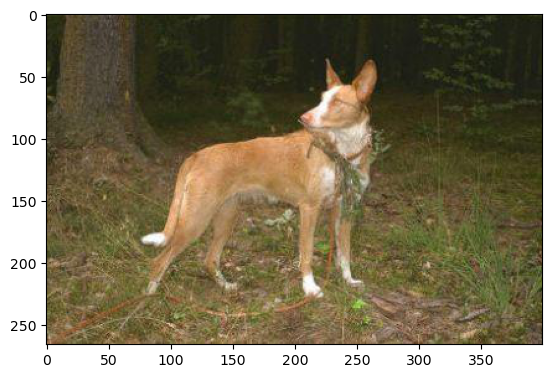

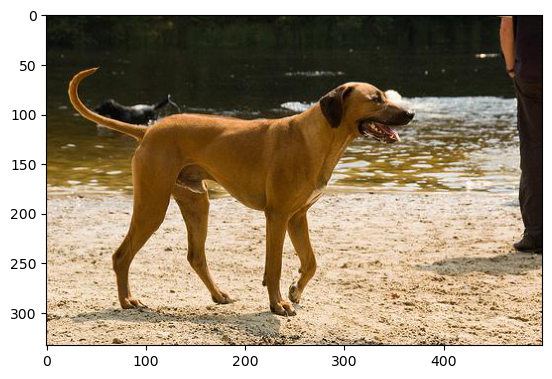

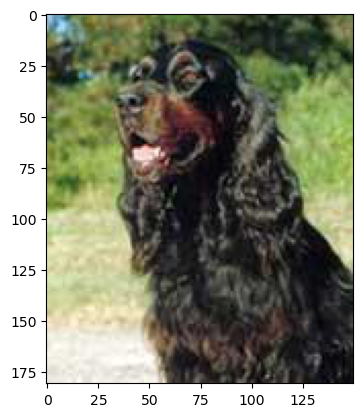

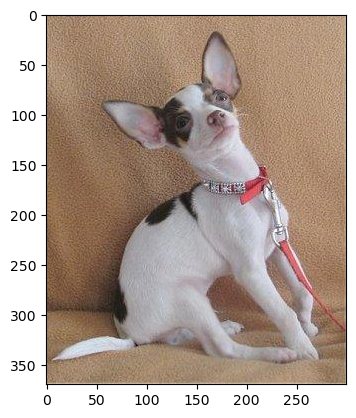

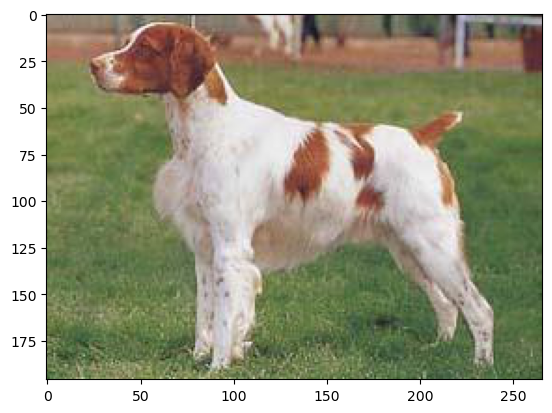

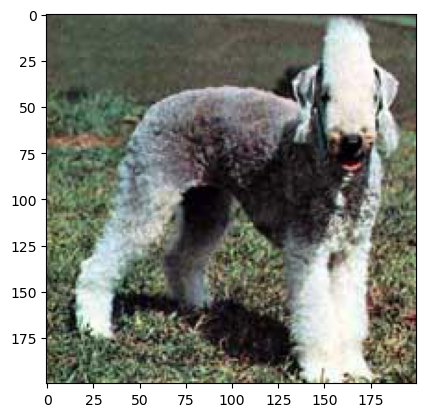

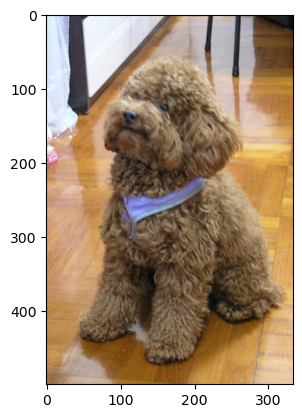

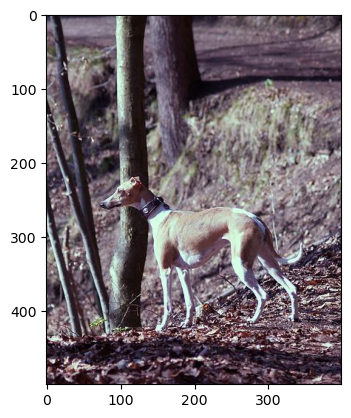

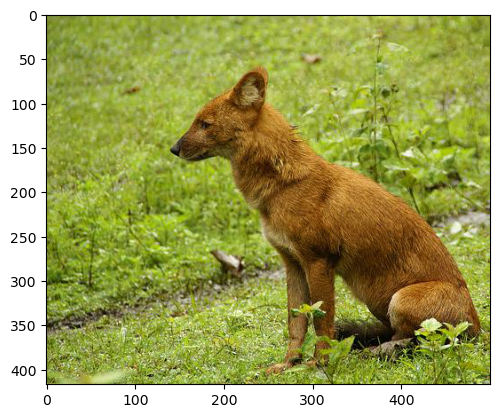

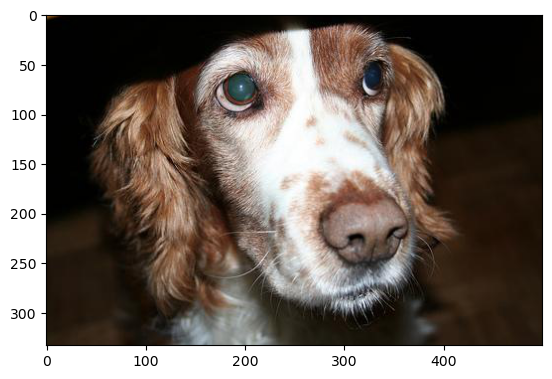

In [92]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

    
idx = np.random.choice(len(dataset), 10)

images = dataset[:, 0][idx]

for file in images:
    process(file)
    
print(dataset[:, 1][idx])

In [210]:
from torchvision import datasets, transforms, models

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([
  # transforms.RandomRotation(30), # 회전
                                      #  transforms.RandomResizedCrop(224), # 랜덤하게 사이즈 자르기
  #                                      transforms.RandomHorizontalFlip(), 
                                       transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], # 이미지의 값들을 바꿔주는 것
                                                            [0.229, 0.224, 0.225]),
                                       Cutout(n_holes=1, length=64),
                                       ])



# test 경우에서는 모두 동일한 사이즈로 맞춰주기 위해서 Resize & CenterCrop을 진행
test_transforms = transforms.Compose([
  transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])
                                      ])

DATASET_PATH = "dataset"
# Pass transforms in here, then run the next cell to see how the transforms look
# ImageFolder : 이미지와 레이블을 자동으로 잡아준다 (파이토치에서 제공)
train_data = datasets.ImageFolder(DATASET_PATH + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(DATASET_PATH + '/test', transform=train_transforms)

In [211]:
import torch
train_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

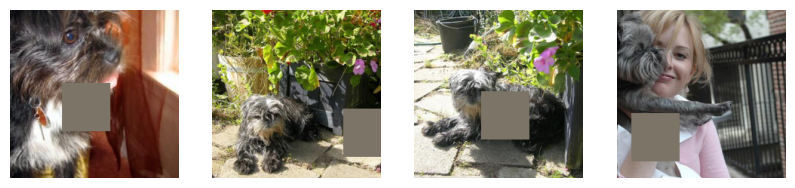

In [212]:
data_iter = iter(test_loader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=True)

In [203]:
import torch
import numpy as np


class Cutout(object):
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        h = img.size(1)
        w = img.size(2)

        mask = np.ones((h, w), np.float32)

        for n in range(self.n_holes):
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            mask[y1: y2, x1: x2] = 0.

        mask = torch.from_numpy(mask)
        mask = mask.expand_as(img)
        img = img * mask

        return img

In [100]:
data_iter = next(iter(test_loader))
# train_loader는 사진들이 변형된 모습을 볼 수 있다
# images, labels = next(data_iter) # 배치 사이즈만큼 사진을 가져오게 된다
# fig, axes = plt.subplots(figsize=(10,4), ncols=4)

# for ii in range(4):
#     ax = axes[ii]
#     imshow(images[ii], ax=ax, normalize=True)

In [79]:
train_transforms = transforms.Compose([
  transforms.RandomRotation(30) # 회전
  #                                      transforms.RandomResizedCrop(224), # 랜덤하게 사이즈 자르기
  #                                      transforms.RandomHorizontalFlip(), 
  #                                      transforms.ToTensor(),
  #                                      transforms.Normalize([0.485, 0.456, 0.406], # 이미지의 값들을 바꿔주는 것
  #                                                           [0.229, 0.224, 0.225]),
  #                                      transforms.GaussianBlur(kernel_size=9, sigma=(0.1, 2.0))
                                       ])

import torch
test_data = datasets.ImageFolder(DATASET_PATH + '/test', transform=train_transforms)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

data_iter = iter(test_loader)
# train_loader는 사진들이 변형된 모습을 볼 수 있다
images, labels = next(data_iter) # 배치 사이즈만큼 사진을 가져오게 된다
# fig, axes = plt.subplots(figsize=(10,4), ncols=4)